In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("game_attributes.csv")


X = data.drop(columns=["winner"])
y = data["winner"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
[[209  20]
 [ 37 219]]
Accuracy: 0.88
Precision: 0.92
Recall: 0.86
F1 Score: 0.88


<Figure size 1200x600 with 0 Axes>

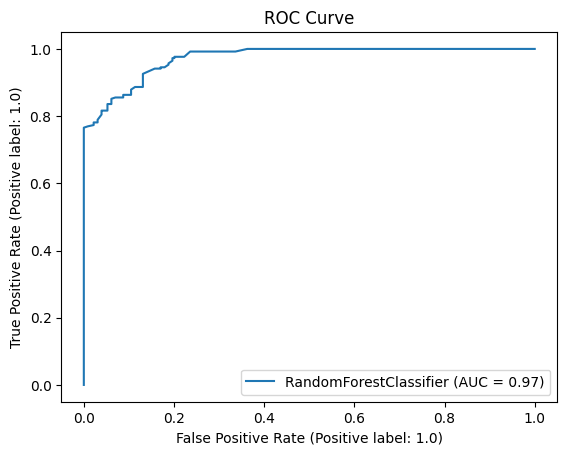

<Figure size 1200x600 with 0 Axes>

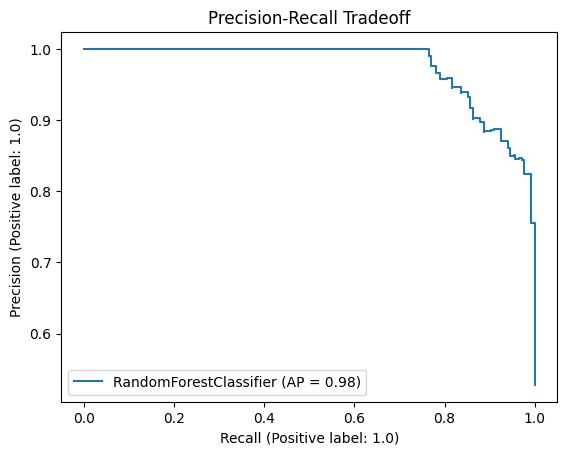

In [27]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt


y_prob = model.predict_proba(X_test)[:, 1]  #Probability for the positive class


roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(12, 6))
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

plt.figure(figsize=(12, 6))
pr_display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title("Precision-Recall Tradeoff")
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.82989691, 0.81958763, 0.81185567, 0.84278351, 0.85529716])

In [25]:
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Mean Cross-Validation Accuracy: 0.83


In [28]:
import pickle


# with open("scaler.pkl", "wb") as scaler_file:
#     pickle.dump(scaler, scaler_file)


# with open("rf_model.pkl", "wb") as model_file:
#     pickle.dump(model, model_file)
